In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [48]:
titanic= pd.DataFrame(sns.load_dataset('titanic'))

In [49]:
titanic.head()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [50]:
print(titanic.shape)

(891, 15)


In [51]:
#identify missing values
missing_values = titanic.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [52]:
#look for duplicate rows
duplicates= titanic.duplicated()
print(duplicates.sum())

107


In [53]:
#remove duplicates
titanic_cleaned= titanic.drop_duplicates()

In [54]:
print (titanic_cleaned.shape)

(784, 15)


In [55]:
#identify inconsistencies in sex column
print("Unique values in 'sex' column:", titanic_cleaned['sex'].unique())

Unique values in 'sex' column: ['male' 'female']


In [61]:
#def detect_outliers_zscore(data, column):
#    mean = data[column].mean()
#    std = data[column].std()
#    z_scores = (data[column] - mean) / std
#    return data[np.abs(z_scores) > 3]

#age_outliers = detect_outliers_zscore(titanic_cleaned, 'age')
#print("Outliers in 'Age':\n", age_outliers)

In [68]:
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column].dropna(), 25)
    Q3 = np.percentile(data[column].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

age_outliers_df = detect_outliers_iqr(titanic_cleaned, 'age') #put in its own dataframe
print(age_outliers_df) 

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
96   man        True    A    Cherbourg    no   True  
116  man        True  NaN   Queenstown    no   True  
493  man        True  NaN    Cherbourg    no   True  
630  man        True    A  Southampton   yes   True  
672  man        True  NaN  Southampton    no   True  
745  man        True    B  Southampton    no  False  
851  

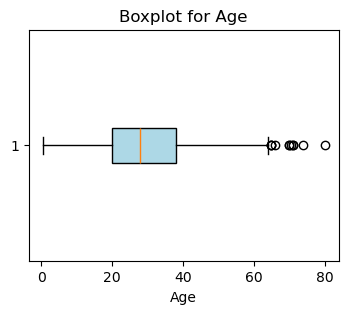

In [69]:
plt.figure(figsize=(4,3))
plt.boxplot(titanic['age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

In [71]:
fare_outliers_df = detect_outliers_iqr(titanic_cleaned, 'fare') #put in its own dataframe
print(fare_outliers_df) 

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
61          1       1  female  38.0      0      0   80.0000      NaN  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
829         1       1  female  62.0      0      0   80.0000      NaN  First   
835         1       1  female  39.0      1      1   83.1583        C  First   
849         1       1  female   NaN      1      0   89.1042        C  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adult_male deck  embark_town alive  alo

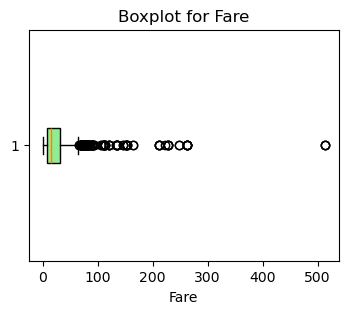

In [70]:
plt.figure(figsize=(4, 3))
plt.boxplot(titanic['fare'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Boxplot for Fare')
plt.xlabel('Fare')
plt.show()

In [75]:
# Combine the outliers into a single DataFrame
outliers_df = pd.concat([age_outliers_df, fare_outliers_df]).drop_duplicates()

# Remove outliers from the original dataset
titanic_cleaned = titanic_cleaned.drop(outliers_df.index)

In [76]:
# Create the "Family_Size" feature
titanic_cleaned.loc[:, 'Family_Size'] = titanic_cleaned['sibsp'] + titanic_cleaned['parch'] + 1 #Adding +1 accounts for the individual themselves
print(titanic_cleaned[['sibsp', 'parch', 'Family_Size']].head())

   sibsp  parch  Family_Size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


In [83]:
#Convert the "Embarked" column to numerical values using label encoding
label_encoder = LabelEncoder()
titanic_cleaned['Embarked_numerical'] = label_encoder.fit_transform(titanic_cleaned['embarked'])
print(titanic_cleaned[['embarked', 'Embarked_numerical']].head())

  embarked  Embarked_numerical
0        S                   2
1        C                   0
2        S                   2
3        S                   2
4        S                   2


In [92]:
if 'ticket_purchase_date' in titanic_cleaned.columns:
    print("The column exists!")
else:
    print("The column does not exist!")

The column does not exist!


In [90]:
# Convert the 'Ticket_Purchase_Date' column to datetime
#titanic_cleaned['Ticket_Purchase_Date'] = pd.to_datetime(titanic_cleaned['Ticket_Purchase_Date'])

# Extract the year and month into new columns
#titanic_cleaned['Year'] = titanic_cleaned['Ticket_Purchase_Date'].dt.year
#titanic_cleaned['Month'] = titanic_cleaned['Ticket_Purchase_Date'].dt.month

# Display the DataFrame
#print(titanic_cleaned)

In [95]:
if 'name' in titanic_cleaned.columns:
    print("The column exists!")
else:
    print("The column does not exist!")

# Remove titles in Name
#titanic_cleaned['Cleaned_Name'] = titanic_cleaned['name'].str.replace(r'(Mr\.|Mrs\.|Miss|Ms\.)', '', regex=True)

# Convert the "Cleaned_Name" column to lowercase
#titanic_cleaned['Cleaned_Name'] = titanic_cleaned['Cleaned_Name'].str.lower()

# Remove leading/trailing whitespace for a polished result
#titanic_cleaned['Cleaned_Name'] = titanic_cleaned['Cleaned_Name'].str.strip()

# Display the DataFrame
#print(titanic_cleaned)

The column does not exist!


In [96]:
#Bin the "Age" column into categories like 'Child', 'Teen', 'Adult', and 'Senior'.
# Define age bins and labels
bins = [0, 12, 19, 59, 120]  # Bins for 'Child', 'Teen', 'Adult', and 'Senior'
labels = ['Child', 'Teen', 'Adult', 'Senior']

# Bin the 'age' column into categories
titanic_cleaned['Age_Category'] = pd.cut(titanic_cleaned['age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the new column
print(titanic_cleaned[['age', 'Age_Category']].head())

    age Age_Category
0  22.0        Adult
1  38.0        Adult
2  26.0        Adult
3  35.0        Adult
4  35.0        Adult
